In [3]:
import numpy
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [13]:
dataset = pd.read_csv("/home/bhavik/projects/cv/src/10NeuralNets/data/Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


/home/bhavik/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


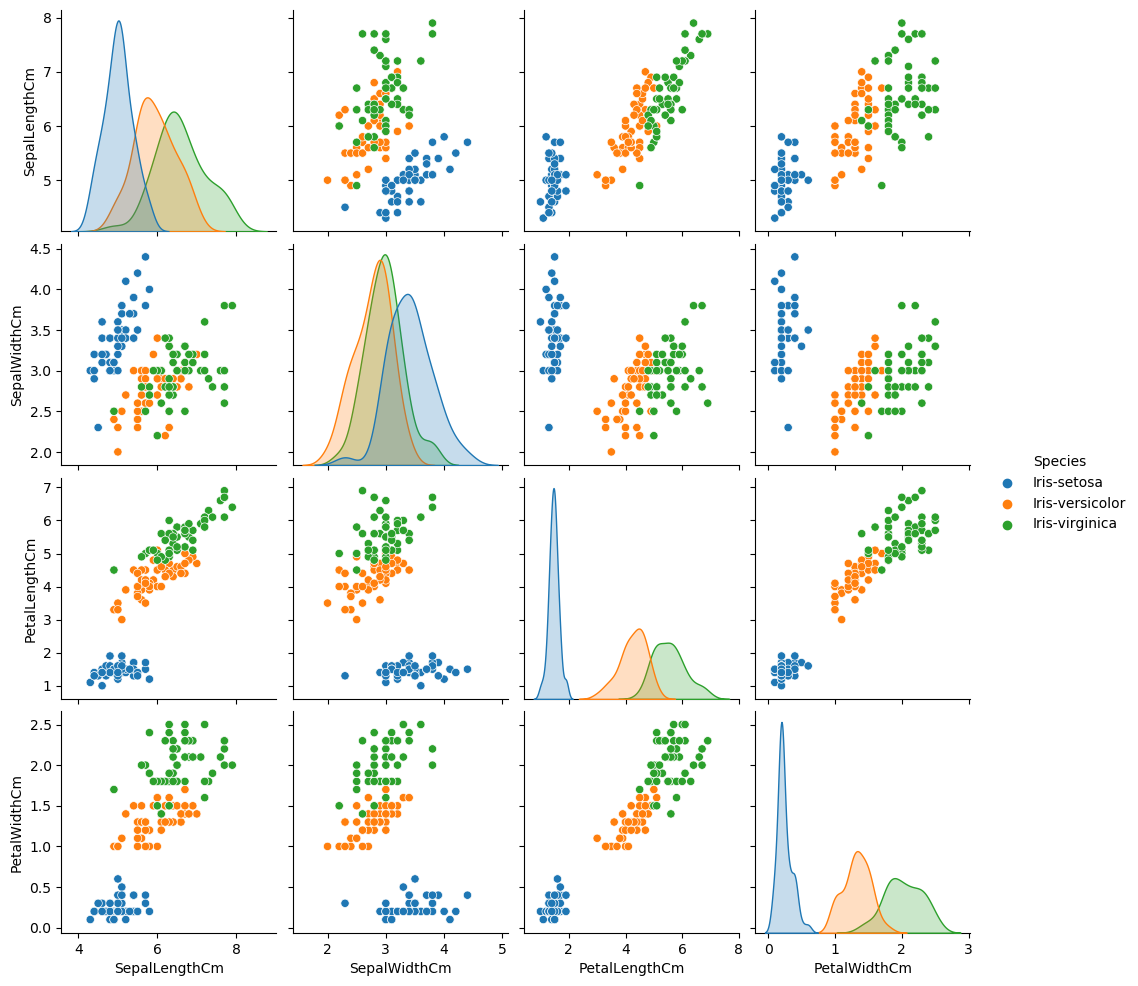

In [22]:
sns.pairplot(dataset.drop('Id',axis=1), hue="Species",size=2.5)

In [18]:
dataset["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

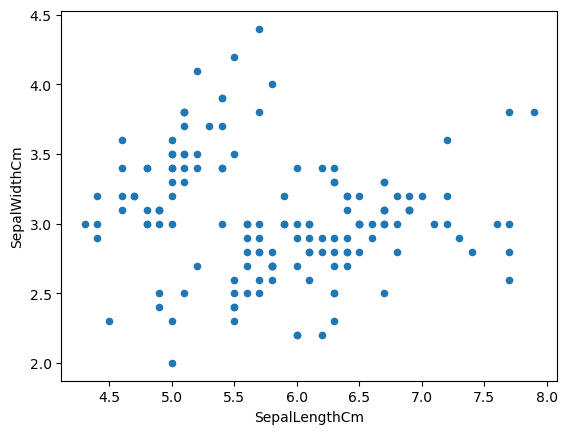

In [20]:
dataset.plot(kind="scatter", x = "SepalLengthCm", y = "SepalWidthCm")

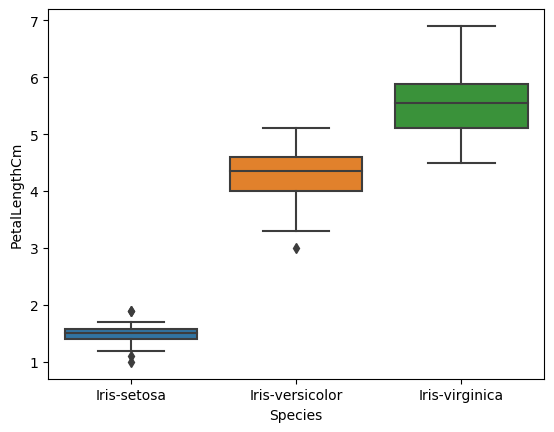

In [21]:
sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)

In [23]:
train, test = train_test_split(dataset, test_size=0.3)

In [25]:
print(test.shape)
print(train.shape)

(45, 6)
(105, 6)


In [30]:
train.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
19,20,5.1,3.8,1.5,0.3,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
29,30,4.7,3.2,1.6,0.2,Iris-setosa
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
28,29,5.2,3.4,1.4,0.2,Iris-setosa


In [31]:
train_X = train[["SepalLengthCm", "SepalWidthCm", 'PetalLengthCm','PetalWidthCm']]
train_y= train.Species
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   

In [32]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
19,5.1,3.8,1.5,0.3
98,5.1,2.5,3.0,1.1
29,4.7,3.2,1.6,0.2
67,5.8,2.7,4.1,1.0
28,5.2,3.4,1.4,0.2


In [33]:
train_y.head()

19        Iris-setosa
98    Iris-versicolor
29        Iris-setosa
67    Iris-versicolor
28        Iris-setosa
Name: Species, dtype: object

In [36]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm  
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 

#### Support Vector machines


In [34]:
from sklearn import svm
from sklearn import metrics

model = svm.SVC()

model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('accuracy of SVM is :',metrics.accuracy_score(prediction, test_y) )

accuracy of SVM is : 0.9777777777777777


#### Logistic regression

In [37]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


#### Decision tree classifier

In [38]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


In [39]:
model=KNeighborsClassifier(n_neighbors=3) 

model.fit(train_X,train_y)
prediction=model.predict(test_X)

print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9777777777777777
